# FLIGHT DELAY PREDICTION USING ML ALGORITHMS

## Data Preprocessing

#### Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9aSkuMDufRQ-_cGNUoBz7Lt6oBI_rXUiZ_yao-U4oncs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelayprediction-donotdelete-pr-ocgt3z2vhznocj'
object_key = 'flightdata2.xlsx'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
data= pd.read_excel(body.read())

In [5]:

data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,ARR_TIME.1,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME1,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2102.0,-41.0,0.0,0,0,05:38:00,04:55:00,338,295.0,2182
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1439.0,4.0,0.0,0,0,01:50:00,01:55:00,110,115.0,528
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1142.0,-33.0,0.0,0,0,05:35:00,05:00:00,335,300.0,2182
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1345.0,10.0,0.0,0,0,03:16:00,03:25:00,196,205.0,1399
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,615.0,8.0,0.0,0,0,04:07:00,04:19:00,247,259.0,1927


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  11231 non-null  int64  
 1   QUARTER               11231 non-null  int64  
 2   MONTH                 11231 non-null  int64  
 3   DAY_OF_MONTH          11231 non-null  int64  
 4   DAY_OF_WEEK           11231 non-null  int64  
 5   UNIQUE_CARRIER        11231 non-null  object 
 6   TAIL_NUM              11231 non-null  object 
 7   FL_NUM                11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID     11231 non-null  int64  
 9   ORIGIN                11231 non-null  object 
 10  DEST_AIRPORT_ID       11231 non-null  int64  
 11  DEST                  11231 non-null  object 
 12  CRS_DEP_TIME          11231 non-null  object 
 13  CRS_DEP_TIME.1        11231 non-null  int64  
 14  DEP_TIME              11124 non-null  object 
 15  DEP_TIME.1         

In [7]:
import datetime as dt


In [8]:
data["CRS_ARR_TIME"]=pd.to_datetime(data["CRS_ARR_TIME"],format='%H:%M:%S').dt.time

In [9]:
data["ARR_TIME"]=pd.to_datetime(data["ARR_TIME"],format='%H:%M:%S').dt.time
data["CRS_DEP_TIME"]=pd.to_datetime(data["CRS_DEP_TIME"],format='%H:%M:%S').dt.time
data["DEP_TIME"]=pd.to_datetime(data["DEP_TIME"],format='%H:%M:%S').dt.time
data["CRS_ELAPSED_TIME1"]=pd.to_datetime(data["CRS_ELAPSED_TIME1"],format='%H:%M:%S').dt.time
data["ACTUAL_ELAPSED_TIME1"]=pd.to_datetime(data["ACTUAL_ELAPSED_TIME1"],format='%H:%M:%S').dt.time

In [10]:
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,ARR_TIME.1,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME1,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2102.0,-41.0,0.0,0,0,05:38:00,04:55:00,338,295.0,2182
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1439.0,4.0,0.0,0,0,01:50:00,01:55:00,110,115.0,528
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1142.0,-33.0,0.0,0,0,05:35:00,05:00:00,335,300.0,2182
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1345.0,10.0,0.0,0,0,03:16:00,03:25:00,196,205.0,1399
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,615.0,8.0,0.0,0,0,04:07:00,04:19:00,247,259.0,1927


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  11231 non-null  int64  
 1   QUARTER               11231 non-null  int64  
 2   MONTH                 11231 non-null  int64  
 3   DAY_OF_MONTH          11231 non-null  int64  
 4   DAY_OF_WEEK           11231 non-null  int64  
 5   UNIQUE_CARRIER        11231 non-null  object 
 6   TAIL_NUM              11231 non-null  object 
 7   FL_NUM                11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID     11231 non-null  int64  
 9   ORIGIN                11231 non-null  object 
 10  DEST_AIRPORT_ID       11231 non-null  int64  
 11  DEST                  11231 non-null  object 
 12  CRS_DEP_TIME          11231 non-null  object 
 13  CRS_DEP_TIME.1        11231 non-null  int64  
 14  DEP_TIME              11124 non-null  object 
 15  DEP_TIME.1         

### Droping unnecessary columns

In [12]:
data1=data.drop(columns=["YEAR","ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID","CRS_DEP_TIME","DEP_TIME.1","CRS_ARR_TIME","ARR_TIME.1","CRS_ELAPSED_TIME1","ACTUAL_ELAPSED_TIME"])

In [13]:
data1.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,...,DEP_DEL15,CRS_ARR_TIME.1,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,DISTANCE
0,1,1,1,5,DL,N836DN,1399,ATL,SEA,1905,...,0.0,2143,21:02:00,-41.0,0.0,0,0,04:55:00,338,2182
1,1,1,1,5,DL,N964DN,1476,DTW,MSP,1345,...,0.0,1435,14:39:00,4.0,0.0,0,0,01:55:00,110,528
2,1,1,1,5,DL,N813DN,1597,ATL,SEA,940,...,0.0,1215,11:42:00,-33.0,0.0,0,0,05:00:00,335,2182
3,1,1,1,5,DL,N587NW,1768,SEA,MSP,819,...,0.0,1335,13:45:00,10.0,0.0,0,0,03:25:00,196,1399
4,1,1,1,5,DL,N836DN,1823,SEA,DTW,2300,...,0.0,607,06:15:00,8.0,0.0,0,0,04:19:00,247,1927


##### count no of values with respect to unique values of each columns

In [14]:
for i in data1.columns:
    print(data1[i].value_counts())

3    3167
2    2777
4    2745
1    2542
Name: QUARTER, dtype: int64
8     1127
7     1078
6      979
9      962
10     955
5      916
12     899
11     891
3      885
4      882
1      860
2      797
Name: MONTH, dtype: int64
8     390
23    381
28    379
11    378
14    378
21    378
22    376
26    375
18    373
9     372
2     371
10    370
15    370
12    369
19    368
27    368
5     366
17    366
16    365
24    363
1     363
13    362
20    362
29    361
25    360
4     360
6     357
7     355
3     351
30    335
31    209
Name: DAY_OF_MONTH, dtype: int64
5    1668
1    1652
4    1637
3    1624
2    1607
7    1593
6    1450
Name: DAY_OF_WEEK, dtype: int64
DL    11231
Name: UNIQUE_CARRIER, dtype: int64
N857DZ    76
N856DN    75
N581NW    73
N582NW    72
N584NW    72
          ..
N906AT     1
N801NW     1
N612DL     1
N328NB     1
N301DN     1
Name: TAIL_NUM, Length: 789, dtype: int64
888     98
589     96
1991    96
588     95
902     94
        ..
2849     1
1531     1
1493     

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   QUARTER               11231 non-null  int64  
 1   MONTH                 11231 non-null  int64  
 2   DAY_OF_MONTH          11231 non-null  int64  
 3   DAY_OF_WEEK           11231 non-null  int64  
 4   UNIQUE_CARRIER        11231 non-null  object 
 5   TAIL_NUM              11231 non-null  object 
 6   FL_NUM                11231 non-null  int64  
 7   ORIGIN                11231 non-null  object 
 8   DEST                  11231 non-null  object 
 9   CRS_DEP_TIME.1        11231 non-null  int64  
 10  DEP_TIME              11124 non-null  object 
 11  DEP_DELAY             11124 non-null  float64
 12  DEP_DEL15             11124 non-null  float64
 13  CRS_ARR_TIME.1        11231 non-null  int64  
 14  ARR_TIME              11116 non-null  object 
 15  ARR_DELAY          

<AxesSubplot:>

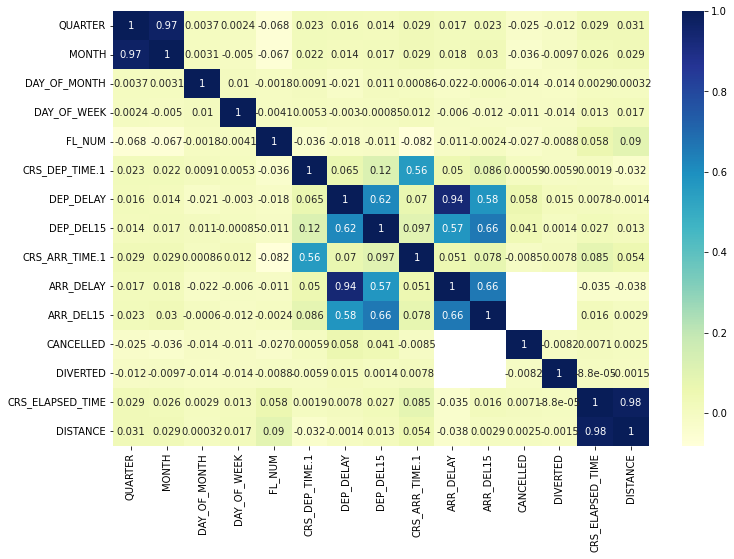

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data1.corr(),cmap="YlGnBu",annot=True)

## Data Cleaning
### Handling Null Values

In [17]:
data1.isna().sum()

QUARTER                   0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
UNIQUE_CARRIER            0
TAIL_NUM                  0
FL_NUM                    0
ORIGIN                    0
DEST                      0
CRS_DEP_TIME.1            0
DEP_TIME                107
DEP_DELAY               107
DEP_DEL15               107
CRS_ARR_TIME.1            0
ARR_TIME                115
ARR_DELAY               188
ARR_DEL15               188
CANCELLED                 0
DIVERTED                  0
ACTUAL_ELAPSED_TIME1      0
CRS_ELAPSED_TIME          0
DISTANCE                  0
dtype: int64

In [18]:
data1.duplicated().sum()

0

In [19]:
data1.iloc[179,:].isnull(),data1.iloc[179,:]

(QUARTER                 False
 MONTH                   False
 DAY_OF_MONTH            False
 DAY_OF_WEEK             False
 UNIQUE_CARRIER          False
 TAIL_NUM                False
 FL_NUM                  False
 ORIGIN                  False
 DEST                    False
 CRS_DEP_TIME.1          False
 DEP_TIME                 True
 DEP_DELAY                True
 DEP_DEL15                True
 CRS_ARR_TIME.1          False
 ARR_TIME                 True
 ARR_DELAY                True
 ARR_DEL15                True
 CANCELLED               False
 DIVERTED                False
 ACTUAL_ELAPSED_TIME1    False
 CRS_ELAPSED_TIME        False
 DISTANCE                False
 Name: 179, dtype: bool,
 QUARTER                        1
 MONTH                          1
 DAY_OF_MONTH                  10
 DAY_OF_WEEK                    7
 UNIQUE_CARRIER                DL
 TAIL_NUM                  N924DN
 FL_NUM                        86
 ORIGIN                       MSP
 DEST                

data1["date"]=data1["DAY_OF_MONTH"].astype("str")+"/"+data1["MONTH"].astype("str")+'/'+data["YEAR"].astype("str")+" "+data1["CRS_DEP_TIME"].astype("str")

data1.date

data1["date"]=pd.to_datetime(data1["date"],format="%d/%m/%Y %H:%M:%S",errors='coerce')
data1["date"]

In [20]:
data1[(data1["TAIL_NUM"]=="N924DN")&(data1["FL_NUM"]==86)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,...,DEP_DEL15,CRS_ARR_TIME.1,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,DISTANCE
179,1,1,10,7,DL,N924DN,86,MSP,DTW,1348,...,NaN,1632,NaT,NaN,NaN,1,0,00:00:00,104,528


In [21]:
data1[(data1["DEP_DEL15"]==0)&(data1["ARR_DEL15"]==1)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,...,DEP_DEL15,CRS_ARR_TIME.1,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,DISTANCE
34,1,1,4,1,DL,N827DN,1770,SEA,MSP,1520,...,0.0,2032,20:48:00,16.0,1.0,0,0,03:27:00,192,1399
128,1,1,7,4,DL,N931DN,744,MSP,ATL,1005,...,0.0,1334,13:49:00,15.0,1.0,0,0,02:39:00,149,907
146,1,1,8,5,DL,N678DL,8,MSP,ATL,1732,...,0.0,2105,21:33:00,28.0,1.0,0,0,02:58:00,153,907
166,1,1,8,5,DL,N711ZX,1473,SEA,JFK,1110,...,0.0,1930,19:50:00,20.0,1.0,0,0,05:40:00,320,2422
167,1,1,8,5,DL,N824DN,1598,SEA,ATL,620,...,0.0,1401,14:16:00,15.0,1.0,0,0,04:56:00,281,2182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11120,4,12,29,4,DL,N301DN,811,ATL,MSP,1350,...,0.0,1532,15:52:00,20.0,1.0,0,0,03:05:00,162,907
11168,4,12,30,5,DL,N947DL,984,ATL,JFK,2055,...,0.0,2315,23:30:00,15.0,1.0,0,0,02:37:00,140,760
11173,4,12,31,6,DL,N659DL,2610,ATL,MSP,725,...,0.0,900,09:21:00,21.0,1.0,0,0,02:48:00,155,907
11187,4,12,3,6,DL,N627DL,95,ATL,DTW,1235,...,0.0,1436,15:00:00,24.0,1.0,0,0,02:11:00,121,594


In [22]:
data1.describe()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,CRS_DEP_TIME.1,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME.1,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,11124.000000,11231.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11231.000000
mean,2.544475,6.628973,15.790758,3.960199,1334.325617,1320.798326,8.460266,0.142844,1537.312795,-2.573123,0.124513,0.010150,0.006589,190.652124,1161.031965
std,1.090701,3.354678,8.782056,1.995257,811.875227,490.737845,36.762969,0.349930,502.512494,39.232521,0.330181,0.100241,0.080908,78.386317,643.683379
min,1.000000,1.000000,1.000000,1.000000,7.000000,10.000000,-16.000000,0.000000,2.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,509.000000
25%,2.000000,4.000000,8.000000,2.000000,624.000000,905.000000,-3.000000,0.000000,1130.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,594.000000
50%,3.000000,7.000000,16.000000,4.000000,1267.000000,1320.000000,-1.000000,0.000000,1559.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,907.000000
75%,3.000000,9.000000,23.000000,6.000000,2032.000000,1735.000000,4.000000,0.000000,1952.000000,1.000000,0.000000,0.000000,0.000000,255.000000,1927.000000
max,4.000000,12.000000,31.000000,7.000000,2853.000000,2359.000000,645.000000,1.000000,2359.000000,615.000000,1.000000,1.000000,1.000000,397.000000,2422.000000


## EDA or Data Analysis

### Data Visualization

<AxesSubplot:xlabel='DEP_DELAY', ylabel='ARR_DELAY'>

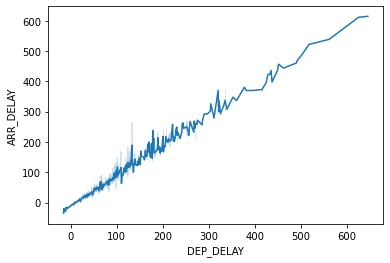

In [23]:
sns.lineplot(x="DEP_DELAY",y="ARR_DELAY",data=data1)

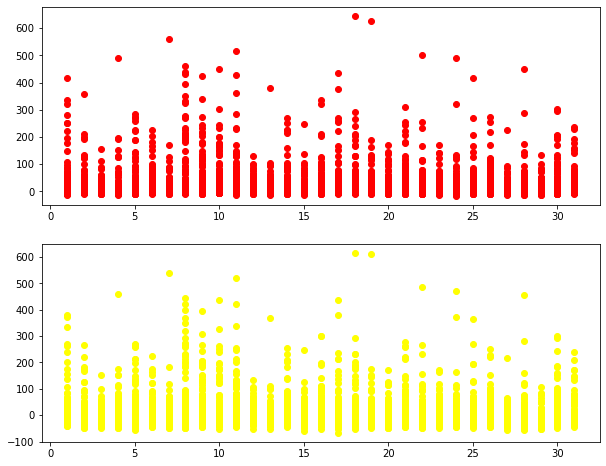

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.scatter(data1["DAY_OF_MONTH"],data1["DEP_DELAY"],color="red")
plt.subplot(2,1,2)
plt.scatter(data1["DAY_OF_MONTH"],data1["ARR_DELAY"],color="yellow")
plt.show()

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='DEP_DELAY'>

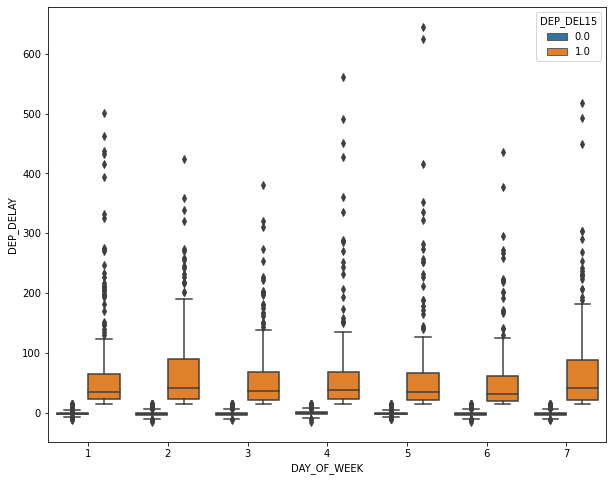

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(x="DAY_OF_WEEK",y="DEP_DELAY",data=data1,hue="DEP_DEL15")

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='ARR_DELAY'>

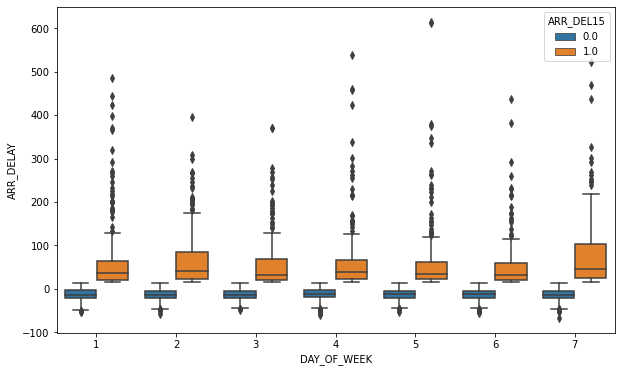

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x="DAY_OF_WEEK",y="ARR_DELAY",data=data1,hue="ARR_DEL15")

<AxesSubplot:xlabel='MONTH', ylabel='ARR_DELAY'>

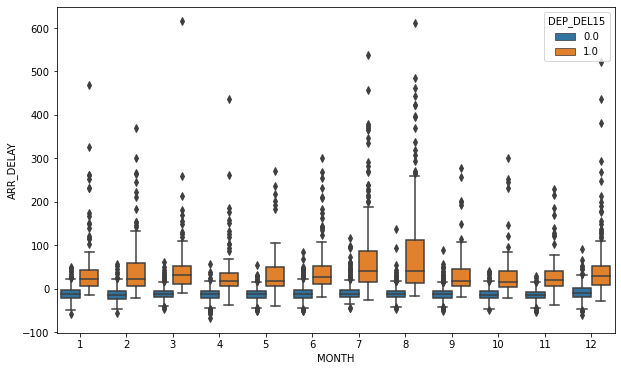

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x="MONTH",y="ARR_DELAY",data=data1,hue="DEP_DEL15")

In [28]:
data1.groupby(by="DAY_OF_WEEK")["DEP_DEL15"].sum()

DAY_OF_WEEK
1    253.0
2    213.0
3    204.0
4    245.0
5    250.0
6    198.0
7    226.0
Name: DEP_DEL15, dtype: float64

In [29]:
data1.groupby(by="MONTH")["DEP_DEL15"].sum()

MONTH
1     113.0
2     115.0
3     104.0
4      96.0
5      86.0
6     168.0
7     219.0
8     246.0
9      88.0
10     86.0
11     66.0
12    202.0
Name: DEP_DEL15, dtype: float64

In [30]:
data1[data1["ARR_DELAY"]>=300]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,...,DEP_DEL15,CRS_ARR_TIME.1,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,DISTANCE
202,1,1,10,7,DL,N125DL,1893,DTW,ATL,835,...,1.0,1049,16:15:00,326.0,1.0,0,0,02:36:00,134,594
565,1,1,24,7,DL,N3753,463,JFK,ATL,1100,...,1.0,1337,21:27:00,470.0,1.0,0,0,02:15:00,157,760
1199,1,2,16,2,DL,N935DL,86,MSP,DTW,1355,...,1.0,1640,21:40:00,300.0,1.0,0,0,01:24:00,105,528
1605,1,2,24,3,DL,N983DL,1156,ATL,JFK,1740,...,1.0,2007,02:18:00,371.0,1.0,0,0,03:18:00,147,760
2535,1,3,18,5,DL,N809DN,2330,SEA,ATL,845,...,1.0,1631,02:46:00,615.0,1.0,0,0,04:16:00,286,2182
2723,2,4,10,7,DL,N624AG,1336,SEA,JFK,749,...,1.0,1600,23:17:00,437.0,1.0,0,0,04:59:00,311,2422
4814,2,6,16,4,DL,N319NB,2816,JFK,MSP,1555,...,1.0,1817,23:18:00,301.0,1.0,0,0,02:48:00,202,1029
5336,3,7,1,5,DL,N171DN,43,JFK,ATL,1525,...,1.0,1813,00:27:00,374.0,1.0,0,0,03:27:00,168,760
5340,3,7,1,5,DL,N355NB,2214,MSP,JFK,1735,...,1.0,2132,03:07:00,335.0,1.0,0,0,03:10:00,177,1029
5378,3,7,1,5,DL,N377NW,984,ATL,JFK,2115,...,1.0,2344,06:04:00,380.0,1.0,0,0,01:54:00,149,760


### Feature Engineering

In [31]:
sm=[6,7,8]
wt=[9,10,11]
sp=[12,1,2,3]
fl=[4,5]

In [32]:
data1["SEASON"]=np.where(data1["MONTH"].isin(sm),0,np.where(data1["MONTH"].isin(wt),1,np.where(data1["MONTH"].isin(sp),2,3)))

In [33]:
data1["SEASON"].value_counts()

2    3441
0    3184
1    2808
3    1798
Name: SEASON, dtype: int64

### Encoding Catagorical cloumns to numerical

In [34]:
data1["CANCELLED"]=np.where(data1["CANCELLED"]==1,4,0)

In [35]:
data1["DIVERTED"]=np.where(data1["DIVERTED"]==1,3,0)

In [36]:
data1.CANCELLED.unique(),data1.DIVERTED.unique()

(array([0, 4]), array([0, 3]))

In [37]:
data1["DELAY_15"]=data1["ARR_DEL15"]+data1["DEP_DEL15"]
data1.DELAY_15.unique()

array([ 0.,  1.,  2., nan])

In [38]:
data1["DELAY_15"].fillna(0,inplace=True)
data1.DELAY_15.unique()

array([0., 1., 2.])

### Feature Engineering

In [39]:
data1["NDELAY"]=data1["DELAY_15"]+data1["CANCELLED"]+data1["DIVERTED"]

In [40]:
data1.NDELAY.unique()

array([0., 1., 2., 3., 4.])

In [41]:
len(data1["TAIL_NUM"].value_counts()),len(data1["FL_NUM"].value_counts())

(789, 690)

In [42]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   QUARTER               11231 non-null  int64  
 1   MONTH                 11231 non-null  int64  
 2   DAY_OF_MONTH          11231 non-null  int64  
 3   DAY_OF_WEEK           11231 non-null  int64  
 4   UNIQUE_CARRIER        11231 non-null  object 
 5   TAIL_NUM              11231 non-null  object 
 6   FL_NUM                11231 non-null  int64  
 7   ORIGIN                11231 non-null  object 
 8   DEST                  11231 non-null  object 
 9   CRS_DEP_TIME.1        11231 non-null  int64  
 10  DEP_TIME              11124 non-null  object 
 11  DEP_DELAY             11124 non-null  float64
 12  DEP_DEL15             11124 non-null  float64
 13  CRS_ARR_TIME.1        11231 non-null  int64  
 14  ARR_TIME              11116 non-null  object 
 15  ARR_DELAY          

## Droping Unnecessary Columns

In [43]:
clm=["UNIQUE_CARRIER","DEP_TIME","DEP_DELAY","DEP_DEL15","ARR_TIME","ARR_DELAY","ARR_DEL15","CANCELLED","DIVERTED",
    "ACTUAL_ELAPSED_TIME1","DELAY_15"]
data2=data1.drop(columns=clm)
data2.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,CRS_ARR_TIME.1,CRS_ELAPSED_TIME,DISTANCE,SEASON,NDELAY
0,1,1,1,5,N836DN,1399,ATL,SEA,1905,2143,338,2182,2,0.0
1,1,1,1,5,N964DN,1476,DTW,MSP,1345,1435,110,528,2,0.0
2,1,1,1,5,N813DN,1597,ATL,SEA,940,1215,335,2182,2,0.0
3,1,1,1,5,N587NW,1768,SEA,MSP,819,1335,196,1399,2,0.0
4,1,1,1,5,N836DN,1823,SEA,DTW,2300,607,247,1927,2,0.0


In [44]:
data3=data2.drop(columns=["TAIL_NUM","FL_NUM"])

In [45]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUARTER           11231 non-null  int64  
 1   MONTH             11231 non-null  int64  
 2   DAY_OF_MONTH      11231 non-null  int64  
 3   DAY_OF_WEEK       11231 non-null  int64  
 4   ORIGIN            11231 non-null  object 
 5   DEST              11231 non-null  object 
 6   CRS_DEP_TIME.1    11231 non-null  int64  
 7   CRS_ARR_TIME.1    11231 non-null  int64  
 8   CRS_ELAPSED_TIME  11231 non-null  int64  
 9   DISTANCE          11231 non-null  int64  
 10  SEASON            11231 non-null  int64  
 11  NDELAY            11231 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 1.0+ MB


array([[<AxesSubplot:title={'center':'QUARTER'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_MONTH'}>],
       [<AxesSubplot:title={'center':'DAY_OF_WEEK'}>,
        <AxesSubplot:title={'center':'CRS_DEP_TIME.1'}>,
        <AxesSubplot:title={'center':'CRS_ARR_TIME.1'}>],
       [<AxesSubplot:title={'center':'CRS_ELAPSED_TIME'}>,
        <AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'SEASON'}>],
       [<AxesSubplot:title={'center':'NDELAY'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

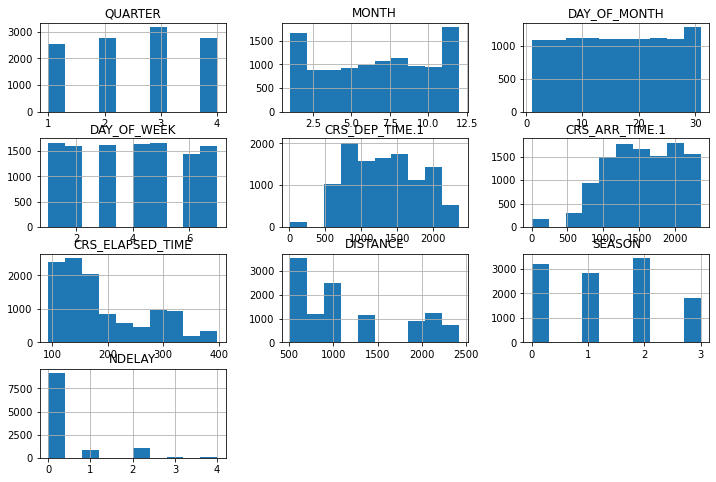

In [46]:
data3.hist(figsize=(12,8))

<AxesSubplot:xlabel='DISTANCE'>

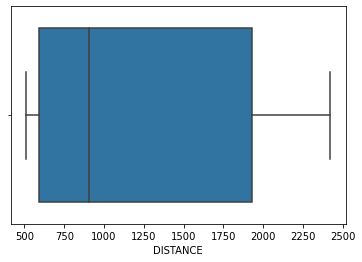

In [47]:
sns.boxplot(x='DISTANCE',data=data3)

In [48]:
data3.NDELAY.value_counts()

0.0    9130
2.0    1035
1.0     878
4.0     114
3.0      74
Name: NDELAY, dtype: int64

## Spliting Dependent and Independent Variables

In [49]:
x=data2.drop(columns=["NDELAY","TAIL_NUM"])
y=data2.NDELAY

### Encoding Categorical cloumns to numerical

In [50]:
x["ORIGIN"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)
x["DEST"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)

## Balancing Dataset Using SMOTE Technique

pip install ibmlearn

from imblearn.combine import SMOTETomek 
smote=SMOTETomek(sampling_strategy={1:2000,2:2000,3:400,4:700},random_state=42)
x1,y2=smote.fit_resample(x,y)
y2.value_counts()

### IBM Watson studio does not support ibmlearn library, we exernally balance and import the balanced data as independent features as x1 and dependent as y2

In [51]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9aSkuMDufRQ-_cGNUoBz7Lt6oBI_rXUiZ_yao-U4oncs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelayprediction-donotdelete-pr-ocgt3z2vhznocj'
object_key = 'X.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

x1 = pd.read_csv(body)
x1.head()


,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,CRS_ARR_TIME.1,CRS_ELAPSED_TIME,DISTANCE,SEASON
0,1,1,1,5,1399,1,5,1905,2143,338,2182,2
1,1,1,1,5,1476,2,4,1345,1435,110,528,2
2,1,1,1,5,1597,1,5,940,1215,335,2182,2
3,1,1,1,5,1768,5,4,819,1335,196,1399,2
4,1,1,1,5,1823,5,2,2300,607,247,1927,2


In [52]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9aSkuMDufRQ-_cGNUoBz7Lt6oBI_rXUiZ_yao-U4oncs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelayprediction-donotdelete-pr-ocgt3z2vhznocj'
object_key = 'Y.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

y2 = pd.read_csv(body)
y2.head()


,NDELAY
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [53]:
from sklearn.utils import shuffle
X,Y=shuffle(x1,y2,random_state=72)
X.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,CRS_ARR_TIME.1,CRS_ELAPSED_TIME,DISTANCE,SEASON
5816,3,8,16,2,786,2,1,1400,1603,123,594,0
475,1,1,25,1,1173,4,2,830,1114,104,528,2
10952,2,6,25,2,2547,5,4,1894,16,197,1399,0
8363,4,11,14,1,1247,5,1,900,1653,293,2182,1
11452,1,2,19,2,1232,1,4,2079,2209,149,744,2


## Splitting Dataset as Training and Testing data

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=0.2,random_state=42)

In [55]:
x_train.shape,x_test.shape

((9856, 12), (2464, 12))

# Model Building

### DecisionTree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.7585227272727273

### RandomForest

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(x_train,y_train.values.ravel())
rf.score(x_test,y_test)

0.8368506493506493

In [58]:
pd.DataFrame(rf.predict(x_test)).value_counts()

0.0    1881
1.0     223
2.0     213
4.0     106
3.0      41
dtype: int64

In [59]:
x_test.iloc[[99,21,22],:]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,CRS_ARR_TIME.1,CRS_ELAPSED_TIME,DISTANCE,SEASON
8817,4,11,3,4,2787,4,1,1935,2308,153,907,1
12270,3,7,26,4,43,3,1,1525,1814,169,760,0
2894,2,4,1,5,1991,4,1,520,845,145,907,3


In [60]:
y_test.iloc[[8,21,912]]

,NDELAY
2318,0.0
12270,4.0
10061,1.0


In [61]:
rf.predict(x_test.iloc[[8,21,912],:])

array([0., 4., 0.])

In [62]:
pd.DataFrame(dc.predict(x_test)).value_counts()

0.0    1641
1.0     323
2.0     319
4.0     120
3.0      61
dtype: int64

### LogisticRegression

In [91]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(solver='sag')
lr1.fit(x_train,y_train.values.ravel())
lr1.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6830357142857143

In [74]:
lr1.predict(x_test).sum()

0.0

### SVM

In [90]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train.values.ravel())
svm.score(x_test,y_test)

0.6128246753246753

In [76]:
pd.DataFrame(svm.predict(x_test)).value_counts()

0.0    2167
2.0     230
4.0      67
dtype: int64

In [77]:
pd.DataFrame(y_test).value_counts()

NDELAY
0.0       1683
1.0        308
2.0        288
4.0        130
3.0         55
dtype: int64

### KNearestNeighborsClassifie

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train.values.ravel())
knn.score(x_test,y_test)

0.729301948051948

In [79]:
pd.DataFrame(knn.predict(x_test)).value_counts()

0.0    1942
2.0     222
1.0     197
4.0      82
3.0      21
dtype: int64

In [80]:
knn.predict(x_test.iloc[[8,21,912],:])

array([0., 0., 3.])

##### we evalute only Random Forest and Decision Tree bacause other models are less accuracy and not predicting correctly

## Evaluation Of Random Forest

Testing Sensitivity for Random Forest 0.9360230547550432
Testing Specificity for Random Forest 0.8716577540106952
Testing Precision for Random Forest 0.9854368932038835
Testing accuracy for Random Forest 0.8368506493506493


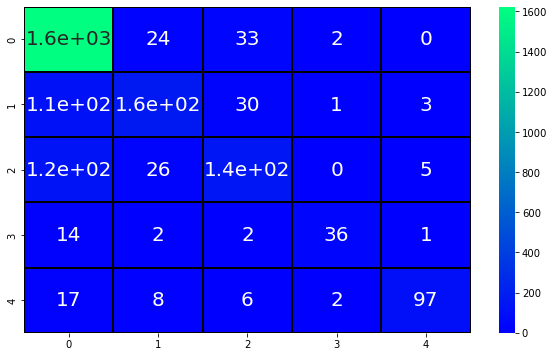

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=rf.predict(x_test)
cm=confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred))

In [82]:
print(classification_report(y_test,pred))#RandomForest

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1683
         1.0       0.73      0.53      0.61       308
         2.0       0.67      0.49      0.57       288
         3.0       0.88      0.65      0.75        55
         4.0       0.92      0.75      0.82       130

    accuracy                           0.84      2464
   macro avg       0.81      0.68      0.73      2464
weighted avg       0.83      0.84      0.83      2464



## Evaluation Of Decission Tree

Testing Accuracy for Decision Tree 0.889321468298109
Testing Sensitivity for Decision Tree 0.9412532637075718
Testing Specificity for Decision Tree 0.5902255639097744
Testing Precision for Decision Tree 0.9297227595099935
Testing accuracy for Decision Tree 0.7585227272727273


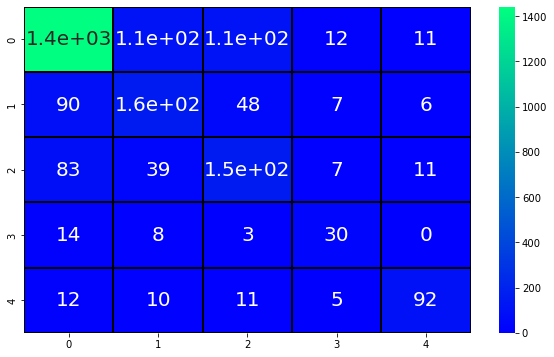

In [83]:
pred1=dc.predict(x_test)
cm1=confusion_matrix(y_test, pred1)
plt.figure(figsize=(10,6))
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Decision Tree',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree',(TN/(TN+FP)))
print('Testing Precision for Decision Tree',(TP/(TP+FP)))
print('Testing accuracy for Decision Tree',accuracy_score(y_test, pred1))

In [84]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1683
         1.0       0.49      0.51      0.50       308
         2.0       0.46      0.51      0.49       288
         3.0       0.49      0.55      0.52        55
         4.0       0.77      0.71      0.74       130

    accuracy                           0.76      2464
   macro avg       0.62      0.63      0.62      2464
weighted avg       0.77      0.76      0.76      2464



In [85]:
import pickle

In [86]:
pickle.dump(rf,open("rfmodel.pkl",'wb'))

In [87]:
pwd

'/home/wsuser/work'

## Deployment

In [95]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 24.3 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.255
    Uninstalling ibm-watson-machine-learning-1.0.255:
      Successfully uninstalled ibm-watson-machine-learning-1.0.255


In [97]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

## Authenticate and Set Space

In [107]:
wml_cred={
    "apikey":"okbr7ARnOQjyplTOyvNFC2QVkCF6q7afpci065Hucby8",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [108]:
wml_clients=APIClient(wml_cred)
wml_clients.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------------  ------------------------
ID                                    NAME                CREATED
6d7c1218-3aca-4256-be3d-d610732530b1  flight_delay_model  2022-11-08T18:02:06.828Z
------------------------------------  ------------------  ------------------------


In [109]:
space_id="6d7c1218-3aca-4256-be3d-d610732530b1"

In [110]:
wml_clients.set.default_space(space_id)

'SUCCESS'

In [111]:
wml_clients.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [112]:
import sklearn
sklearn.__version__

'1.0.2'

In [122]:
MODEL_NAME="randomforest"
DEPLOYMENT_NAME="rf_deployment"
DEMO_MODEL=rf

In [114]:
soft_sepc_id=wml_clients.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [115]:
model_props={
    wml_clients.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_clients.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    wml_clients.repository.ModelMetaNames.SOFTWARE_SPEC_UID: soft_sepc_id
    
}

In [116]:
model_details=wml_clients.repository.store_model(model=DEMO_MODEL,meta_props=model_props,training_data=x_train,
                                                training_target=y_train.values.ravel())

In [117]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'QUARTER', 'type': 'int64'},
      {'name': 'MONTH', 'type': 'int64'},
      {'name': 'DAY_OF_MONTH', 'type': 'int64'},
      {'name': 'DAY_OF_WEEK', 'type': 'int64'},
      {'name': 'FL_NUM', 'type': 'int64'},
      {'name': 'ORIGIN', 'type': 'int64'},
      {'name': 'DEST', 'type': 'int64'},
      {'name': 'CRS_DEP_TIME.1', 'type': 'int64'},
      {'name': 'CRS_ARR_TIME.1', 'type': 'int64'},
      {'name': 'CRS_ELAPSED_TIME', 'type': 'int64'},
      {'name': 'DISTANCE', 'type': 'int64'},
      {'name': 'SEASON', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-08T18:23:18.845Z',
  'id': '9f4b1552-f87d-4192-ae5f-9323b9d56337',
  'modified_at': '2022-11-08T18:23:28.080Z',
  '

In [118]:
model_id=wml_clients.repository.get_model_id(model_details)

In [119]:
model_id

'9f4b1552-f87d-4192-ae5f-9323b9d56337'

In [124]:
dep_props={
    wml_clients.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_clients.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [125]:
deployment=wml_clients.deployments.create(artifact_uid=model_id,meta_props=dep_props)



#######################################################################################

Synchronous deployment creation for uid: '9f4b1552-f87d-4192-ae5f-9323b9d56337' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='b54f9857-1352-432a-8ab1-144ebda20501'
------------------------------------------------------------------------------------------------


